# Data Visualization Assignment

[Link to original data set.](https://www.kaggle.com/nypd/vehicle-collisions)


This data set shows the road accidents in New York City. I will be exploring the locations that these accidents happen through cartography as well as grouping the locations by borough to find which borough has the highest number of road accidents and the severity of them -- how many injured/dead. Possible reasons for this will also be examined.

In [1]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
from cartopy.io import img_tiles
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (8, 8)

## Data Loading

In [3]:
# loading the dataset
collisions_original = pd.read_csv( "vehicle_collisions.csv" )

In [4]:
# original dataset
collisions_original.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,01/01/2015,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,01/01/2015,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [5]:
# Renaming column headings so that all the names are lowercased with no spacings
col_renamed = collisions_original.rename(columns={
    "UNIQUE KEY":"key",
    "DATE":"date",
    "TIME":"time",
    "BOROUGH":"borough",
    "ZIP CODE":"zip_code",
    "LATITUDE":"lat",
    "LONGITUDE":"long",
    "LOCATION":"coordinates",
    "ON STREET NAME":"street",
    "CROSS STREET NAME":"cross_street",
    "OFF STREET NAME":"off_street",
    "PERSONS INJURED":"total_injured",
    "PERSONS KILLED":"total_killed",
    "PEDESTRIANS INJURED":"pedestrians_injured",
    "PEDESTRIANS KILLED":"pedestrians_killed",
    "CYCLISTS INJURED":"cyclists_injured",
    "CYCLISTS KILLED":"cyclists_killed",
    "MOTORISTS INJURED":"motorists_injured",
    "MOTORISTS KILLED":"motorists_killed",
    "VEHICLE 1 TYPE":"vehicle_1",
    "VEHICLE 2 TYPE":"vehicle_2",
    "VEHICLE 3 TYPE":"vehicle_3",
    "VEHICLE 4 TYPE":"vehicle_4",
    "VEHICLE 5 TYPE":"vehicle_5",
    "VEHICLE 1 FACTOR":"vehicle_1_factor",
    "VEHICLE 2 FACTOR":"vehicle_2_factor",
    "VEHICLE 3 FACTOR":"vehicle_3_factor",
    "VEHICLE 4 FACTOR":"vehicle_4_factor",
    "VEHICLE 5 FACTOR":"vehicle_5_factor"
})

In [6]:
col_renamed.head()

,key,date,time,borough,zip_code,lat,long,coordinates,street,cross_street,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,vehicle_1_factor,vehicle_2_factor,vehicle_3_factor,vehicle_4_factor,vehicle_5_factor
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,01/01/2015,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,01/01/2015,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


## Cleaning the data
- Examining outliers and missing values

In [7]:
# Cleaning the data - removing values that the coordinates are missing or an anomaly
col_full1 = col_renamed[col_renamed["lat"] != 0]
col_full2 = col_full1[col_full1["long"] != 0]


col_full = col_full1.dropna(subset=["long", "lat"])
col_full = col_full.drop([470338, 436646, 463276, 471294, 458801, 436931, 475101, 461890], axis=0)

## Data Analysis

In [8]:
# determining range for map
min_long = min(col_full["long"])
max_long = max(col_full["long"])
min_lat = min(col_full["lat"])
max_lat = max(col_full["lat"])

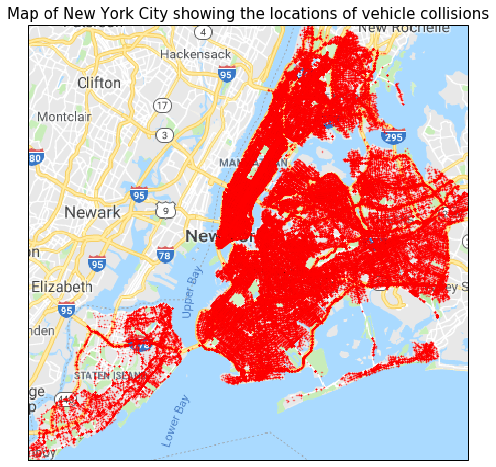

In [9]:
# generating map for all accidents
imagery = img_tiles.GoogleTiles()

ax = plt.axes(projection=imagery.crs)

maps_limits = (-74.253031, -73.700597, 40.4991346, 40.912884)
ax.set_extent(maps_limits)

ax.add_image(imagery, 10)

plt.plot(col_full.long, col_full.lat, transform=ccrs.Geodetic(), 
         marker='.', markersize=1, color="red",  linewidth=0, alpha=0.5)
plt.title("Map of New York City showing the locations of vehicle collisions", size = 15)

plt.show();


As shown in the map above, it seems like Brooklyn has the most number of accidents, this is confirmed in the bar chart below. Area of the borough and population size are factors that play into this. If the borough is of a greater area, more collisions would occur because there is more space for it to happen. In regards to the population size, if there is more people in the borough more collisions would happen because more people would increase the probability of two or more cars colliding with each other. The number of collisions reflect these factors as Brooklyn and Queens, the two largest boroughs have the most collisions, which is followed by Manhattan which has the most people.

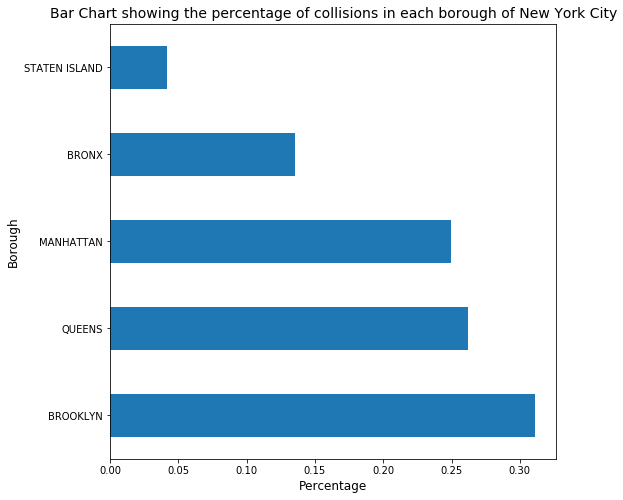

In [10]:
col_full.borough.value_counts(normalize=True).plot.barh();
plt.title("Bar Chart showing the percentage of collisions in each borough of New York City", size = 14)
plt.xlabel("Percentage", size = 12)
plt.ylabel("Borough", size = 12);

To eliminate the factors of area and population, I will next factor in population density. A list of the population density for each borough is shown below. This was calculated by the population divided by the area of the borough.

In [11]:
# list of the population density of each borough in km^2
popdens = [["MANHATTAN", 27826], ["BROOKLYN", 14649], ["QUEENS", 8354], ["BRONX", 13231], ["STATEN ISLAND", 3132]]

# turning the list into a dataframe so it can be joined with the collision count dataframe
b_popdens = pd.DataFrame(popdens, columns = ['borough', 'population_density'])
b_popdens

,borough,population_density
0,MANHATTAN,27826
1,BROOKLYN,14649
2,QUEENS,8354
3,BRONX,13231
4,STATEN ISLAND,3132


In [12]:
# counting how many collisions per borough
borough_counts = col_full["borough"].value_counts().values

In [13]:
# turning the series of collisions per borough into a datafram
count_borough = col_full["borough"].value_counts().to_frame().reset_index()

count_borough.columns=["borough", "collision_count"]

count_borough

,borough,collision_count
0,BROOKLYN,96153
1,QUEENS,81071
2,MANHATTAN,77158
3,BRONX,41788
4,STATEN ISLAND,12819


In [14]:
# merging the dataframe of population density per borough and collision count
b_colperpopdens = pd.merge(count_borough, b_popdens, left_on="borough", right_on="borough")
b_colperpopdens

,borough,collision_count,population_density
0,BROOKLYN,96153,14649
1,QUEENS,81071,8354
2,MANHATTAN,77158,27826
3,BRONX,41788,13231
4,STATEN ISLAND,12819,3132


In [15]:
# making a new column which is the collision per population density. This is the collision count divided by population density.
b_colperpopdens["collsion_per_population_density"] = b_colperpopdens["collision_count"] / b_colperpopdens["population_density"]
b_colperpopdens

,borough,collision_count,population_density,collsion_per_population_density
0,BROOKLYN,96153,14649,6.563793
1,QUEENS,81071,8354,9.704453
2,MANHATTAN,77158,27826,2.772874
3,BRONX,41788,13231,3.158340
4,STATEN ISLAND,12819,3132,4.092912


In [16]:
# deleting the collision count and population density from the dataframe
del b_colperpopdens["collision_count"]
del b_colperpopdens["population_density"]

In [17]:
# setting the index to borough
b_colperpopdens.set_index('borough',inplace=True)
b_colperpopdens

,collsion_per_population_density
borough,
BROOKLYN,6.563793
QUEENS,9.704453
MANHATTAN,2.772874
BRONX,3.158340
STATEN ISLAND,4.092912


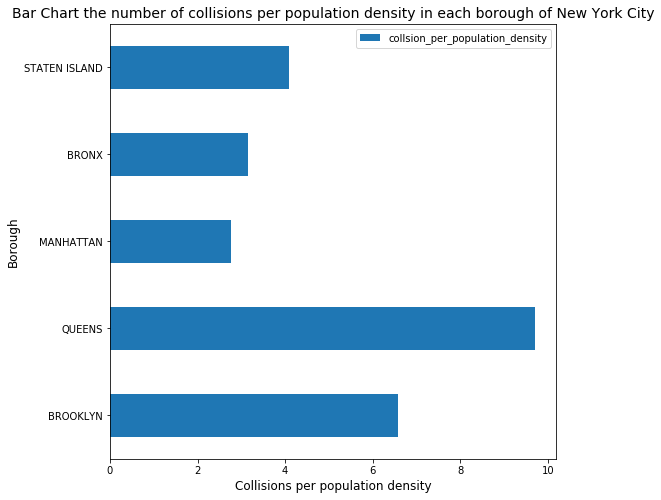

In [18]:
b_colperpopdens.plot.barh();
plt.title("Bar Chart the number of collisions per population density in each borough of New York City", size = 14)
plt.xlabel("Collisions per population density", size = 12)
plt.ylabel("Borough", size = 12);

By taking the population density into accound, Manhattan actually has the least number of collisions. This makes sense as Manhattan is the smallest and more populated borough. The 'real' population of Manhattan would be even greater as there is always lots of tourists as well as people commuting in for work daily from places like New Jersey an the other boroughs. Knowing the city of Manhattan, most people also don't drive -- walking, biking or taking the subway is very common which would decrease the number of road accidents as people are on the road less. Because of this, cars on the road are also aware and are used to having many pedestrians and bikers on the streets, so they know to look out and be aware of them. There is also always a lot of traffic in Manhattan, so the vehicles will be driving a lot slower, so accidents are less liking to happen.

One interesting thing is that Queens is so high on the chart. Though initially surprising, it makes more sense when analysing characteristics of Queens and what is in it. In Queens is two of the main airports of New York City -- JFK and LaGuardia. So, for anyone needing to travel anywhere, they will have to commute to queens, increasing the people in Queens, but not effecting the population statistic. The traffic in the Queens–Midtown Tunnel is also the worst of the ways to get to the city, therefore increasing the chance of a collision. A geographic factor could be that in order to get to Long Island from Manhattan, you would have to pass through Queens, further increasing the number of cars in the area. Furthermore, unlike in the city, Queens does not have good public transport, so most people rely on their own cars, increasing the number of vehicles on the road.

To validate and explore these explanatations, I will next delve into the reasons for the collision.

In [19]:
# making a dataset of just the collisions in Queens
col_queens = col_full[col_full.borough == "QUEENS"]
col_queens.head()

,key,date,time,borough,zip_code,lat,long,coordinates,street,cross_street,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,vehicle_1_factor,vehicle_2_factor,vehicle_3_factor,vehicle_4_factor,vehicle_5_factor
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
6,3146102,01/01/2015,10:00,QUEENS,11105.0,40.776519,-73.915920,"(40.7765195, -73.91592)",26 STREET,23 AVENUE,...,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY/STATION WAGON,NaN,NaN,ALCOHOL INVOLVEMENT,UNSPECIFIED,UNSPECIFIED,NaN,NaN
13,3146083,01/01/2015,10:30,QUEENS,11354.0,40.769353,-73.832577,"(40.7693526, -73.8325765)",LINDEN PLACE,31 ROAD,...,PASSENGER VEHICLE,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN
14,3146907,01/01/2015,10:36,QUEENS,11368.0,40.740039,-73.852880,"(40.740039, -73.8528801)",WESTSIDE AVENUE,VANDOREN STREET,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN
18,3146046,01/01/2015,11:20,QUEENS,11419.0,40.689710,-73.826856,"(40.6897104, -73.8268556)",101 AVENUE,118 STREET,...,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [20]:
# removing all irrelavent columns
col_queens=col_queens[['borough', 'vehicle_1_factor', 'vehicle_2_factor', 'vehicle_3_factor', 'vehicle_4_factor', 'vehicle_5_factor']]
col_queens.head()

,borough,vehicle_1_factor,vehicle_2_factor,vehicle_3_factor,vehicle_4_factor,vehicle_5_factor
0,QUEENS,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
6,QUEENS,ALCOHOL INVOLVEMENT,UNSPECIFIED,UNSPECIFIED,NaN,NaN
13,QUEENS,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN
14,QUEENS,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN
18,QUEENS,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [21]:
# removing NaN
col_queens['vehicle_1_factor'] = col_queens.vehicle_1_factor.fillna('')
col_queens['vehicle_2_factor'] = col_queens.vehicle_2_factor.fillna('')
col_queens['vehicle_3_factor'] = col_queens.vehicle_3_factor.fillna('')
col_queens['vehicle_4_factor'] = col_queens.vehicle_4_factor.fillna('')
col_queens['vehicle_5_factor'] = col_queens.vehicle_5_factor.fillna('')

In [22]:
# removing UNSPECIFIED
col_queens['vehicle_1_factor'] = col_queens.vehicle_1_factor.replace("UNSPECIFIED", '')
col_queens['vehicle_2_factor'] = col_queens.vehicle_2_factor.replace("UNSPECIFIED", '')
col_queens['vehicle_3_factor'] = col_queens.vehicle_3_factor.replace("UNSPECIFIED", '')
col_queens['vehicle_4_factor'] = col_queens.vehicle_4_factor.replace("UNSPECIFIED", '')
col_queens['vehicle_5_factor'] = col_queens.vehicle_5_factor.replace("UNSPECIFIED", '')

In [23]:
# merging all the factors together in one column
col_queens['factors'] = col_queens['vehicle_1_factor'].str.cat(col_queens[['vehicle_2_factor', 'vehicle_3_factor', 'vehicle_4_factor', 'vehicle_5_factor']],sep=", ")
col_queens=col_queens[['borough', 'factors']]

In [24]:
# grouping the specific factors of the collision into broader groups
car_defects = ['TRAFFIC CONTROL DEVICE IMPROPER/NOT-WORKING', 'STEERING FAILURE', 'BRAKES DEFECTIVE', 'OVERSIZED VEHICLE', 'OTHER LIGHTING DEFECTS',  'TIRE FAILURE/INADEQUATE', 'ACCELERATOR DEFECTIVE', 'TOW HITCH DEFECTIVE', 'HEADLIGHTS DEFECTIVE', 'SHOULDER DEFECTIVE/IMPROPER, WINDSHIELD INADEQUATE']
unsafe_driving = ['TRAFFIC CONTROL DISREGARDED', 'DRIVER INATTENTION/DISTRACTION', 'FAILURE TO YIELD RIGHT-OF-WAY','AGGRESSIVE DRIVING/ROAD RAGE', 'PASSENGER DISTRACTION', 'CELL PHONE (HAND-HELD)', 'BACKING UNSAFELY', 'DRIVER INEXPERIENCE', 'UNSAFE SPEED', 'TURNING IMPROPERLY', 'CELL PHONE (HANDS-FREE)', 'OTHER ELECTRONIC DEVICE', 'FOLLOWING TOO CLOSELY', 'FAILURE TO KEEP RIGHT', 'PASSING OR LANE USAGE IMPROPER', 'UNSAFE LANE CHANGING',]
driver_not_fit = ['ALCOHOL INVOLVEMENT', 'PRESCRIPTION MEDICATION', 'LOST CONSCIOUSNESS', 'PHYSICAL DISABILITY', 'FATIGUED/DROWSY', 'DRUGS (ILLEGAL)', 'FELL ASLEEP', 'ILLNESS']
other_cars = ['OTHER VEHICULAR', 'OUTSIDE CAR DISTRACTION', 'REACTION TO OTHER UNINVOLVED VEHICLE', 'PEDESTRIAN/BICYCLIST/OTHER PEDESTRIAN ERROR/CONFUSION', 'DRIVERLESS/RUNAWAY VEHICLE']
other = ['GLARE', 'VIEW OBSTRUCTION/LIMITED', 'PAVEMENT SLIPPERY', 'PAVEMENT DEFECTIVE', 'OBSTRUCTION/DEBRIS', 'ANIMALS ACTION', 'LANE MARKING IMPROPER/INADEQUATE']

In [25]:
# making a list for each of the broader groups for the causes of the collision.
cd = []
ud = []
dnf = []
oc = []
o = []

# if the reason for the collision is in the groups, it gets added to the list.
for factor in col_queens.factors:
    for x in car_defects:
        if x in factor:
            cd.append( factor )
            
for factor in col_queens.factors:
    for x in unsafe_driving:
        if x in factor:
            ud.append( factor )
            
for factor in col_queens.factors:
    for x in driver_not_fit:
        if x in factor:
            dnf.append( factor )

for factor in col_queens.factors:
    for x in other_cars:
        if x in factor:
            oc.append( factor )
            
for factor in col_queens.factors:
    for x in other:
        if x in factor:
            o.append( factor )

In [26]:
# making a list for the number of factor in each group, then turning it into a dataframe
factors_freq = [["Car Defects", len(cd)], ["Unsafe Driving", len(ud)], ["Driver Not Fit", len(dnf)], ["Other Cars", len(oc)], ["Other", len(o)]]
df_factors_freq = pd.DataFrame(factors_freq, columns = ['Factor', 'Frequency'])

In [27]:
# setting the index to the factor
df_factors_freq.set_index('Factor',inplace=True)
df_factors_freq

,Frequency
Factor,
Car Defects,845
Unsafe Driving,30809
Driver Not Fit,8310
Other Cars,2533
Other,1589


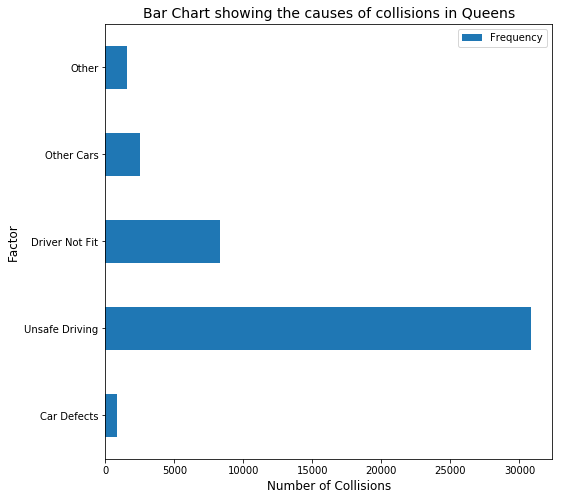

In [28]:
df_factors_freq.plot.barh()
plt.title("Bar Chart showing the causes of collisions in Queens", size = 14)
plt.xlabel("Number of Collisions", size = 12)
plt.ylabel("Factor", size = 12);

By far, the most common factor for collisions in Queens is unsafe driving. With the traffic that is caused by reasons explained earlier, this would make sense. With heavy traffic, people are more careless driving and are most desparate to get to places faster, therefore are willing to break more driving rules. This is especially true if they are catching a flight at JFK or LaGuardia airport.